In [277]:
# Final Project: Credit Card Fraud Models
# Group Members: Cole, Jared, Mansuur

In [278]:
import math
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import model_selection
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

import random

In [279]:
# Create a function to open input file
# Return list of instances
def get_inst_from_file(filename):
    all_instances = []
    fin = open(filename,"r")
    fin.readline()

    for line in fin:
        all_instances.append(line.strip().split(","))
    
    fin.close()
    
    #Check for nulls, returned nothing
    for instance in all_instances:
        for i in range(7):
            if instance[i] is None:
                print("Instance with none")
                
    return all_instances


In [280]:
# Print first 10 instances
cf_instances = get_inst_from_file("card_transdata.csv")
print(cf_instances[:16])

[['57.87785658389723', '0.3111400080477545', '1.9459399775518593', '1.0', '1.0', '0.0', '0.0', '0.0'], ['10.829942699255545', '0.17559150228166587', '1.2942188106198573', '1.0', '0.0', '0.0', '0.0', '0.0'], ['5.091079490616996', '0.8051525945853258', '0.42771456119427587', '1.0', '0.0', '0.0', '1.0', '0.0'], ['2.2475643282963613', '5.60004354707232', '0.36266257805709584', '1.0', '1.0', '0.0', '1.0', '0.0'], ['44.19093600261837', '0.5664862680583477', '2.2227672978404707', '1.0', '1.0', '0.0', '1.0', '0.0'], ['5.586407674186407', '13.261073268058121', '0.06476846537046335', '1.0', '0.0', '0.0', '0.0', '0.0'], ['3.7240191247148107', '0.9568379284821842', '0.27846494490815554', '1.0', '0.0', '0.0', '1.0', '0.0'], ['4.8482465722805665', '0.3207354272228163', '1.2730495235601782', '1.0', '0.0', '1.0', '0.0', '0.0'], ['0.8766322564943629', '2.5036089266921437', '1.5169993152858177', '0.0', '0.0', '0.0', '0.0', '0.0'], ['8.83904670372637', '2.9705122760243827', '2.36168254706846', '1.0', '0.

In [281]:
# Printing out the number of fraud and not fraud instances respectively
not_fraud_instances = []
fraud_instances = []
for instance in cf_instances:
    if (instance[7] == '1.0'):
        curInstance = instance
        curInstance[7] = 1
        fraud_instances.append(curInstance)
    else:
        curInstance = instance
        curInstance[7] = 0
        not_fraud_instances.append(curInstance)
print(fraud_instances[:10])
print('')
print(not_fraud_instances[:10])

#Creates a smaller sample of non-fradulant purchases, randomly selected w/o overlapo
not_fraud_sample = random.sample(not_fraud_instances, len(fraud_instances))

#Joining the smaller fraud sample with the fraud_instances
allSample = fraud_instances + not_fraud_sample
X = []
y = []


#Creating X and y arrays, X w/o label and y with.
for instance in allSample:
    X.append(instance[:7])
    y.append(instance[7])
{}


[['2.131955665990563', '56.3724005365082', '6.358667321630612', '1.0', '0.0', '0.0', '1.0', 1], ['3.8030573513256023', '67.24108052618409', '1.8729496143044642', '1.0', '0.0', '0.0', '1.0', 1], ['15.694985541059943', '175.98918151972342', '0.8556228290724207', '1.0', '0.0', '0.0', '1.0', 1], ['26.711462023719893', '1.5520081259491354', '4.603600688206188', '1.0', '1.0', '0.0', '1.0', 1], ['10.664473716016785', '1.5657690862016613', '4.886520843107555', '1.0', '0.0', '0.0', '1.0', 1], ['2.530145018135443', '3.6897810904940105', '8.297406866219774', '1.0', '0.0', '0.0', '1.0', 1], ['21.12611616077098', '0.27198739643980063', '6.081770719263626', '1.0', '0.0', '0.0', '1.0', 1], ['151.37043724281128', '5.340080994904885', '1.171566647935164', '1.0', '0.0', '0.0', '1.0', 1], ['9.598401340573979', '0.4545563461632137', '6.084828700634962', '1.0', '0.0', '0.0', '1.0', 1], ['22.545587575167414', '0.35393925466184956', '4.0954422060767035', '1.0', '0.0', '0.0', '1.0', 1]]

[['57.87785658389723'

{}

In [282]:
# Create train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3 , random_state=42)

Feature importance: 
[0.26727828 0.15317161 0.45099349 0.         0.02863298 0.02783483
 0.07208881]
Accuracy score: 0.9909233057473018


[Text(0.5, 0.9, 'x[2] <= 4.0\nentropy = 1.0\nsamples = 122364\nvalue = [61192.0, 61172.0]'),
 Text(0.22, 0.7, 'x[0] <= 100.002\nentropy = 0.743\nsamples = 74367\nvalue = [58678, 15689]'),
 Text(0.36, 0.8, 'True  '),
 Text(0.08, 0.5, 'x[1] <= 50.018\nentropy = 0.323\nsamples = 60367\nvalue = [56811, 3556]'),
 Text(0.04, 0.3, 'entropy = 0.0\nsamples = 56294\nvalue = [56294, 0]'),
 Text(0.12, 0.3, 'x[5] <= 0.5\nentropy = 0.549\nsamples = 4073\nvalue = [517, 3556]'),
 Text(0.08, 0.1, 'entropy = 0.496\nsamples = 3990\nvalue = [434, 3556]'),
 Text(0.16, 0.1, 'entropy = 0.0\nsamples = 83\nvalue = [83, 0]'),
 Text(0.36, 0.5, 'x[6] <= 0.5\nentropy = 0.567\nsamples = 14000\nvalue = [1867.0, 12133.0]'),
 Text(0.28, 0.3, 'x[1] <= 49.942\nentropy = 0.58\nsamples = 1207\nvalue = [1040, 167]'),
 Text(0.24, 0.1, 'entropy = 0.0\nsamples = 1038\nvalue = [1038, 0]'),
 Text(0.32, 0.1, 'entropy = 0.093\nsamples = 169\nvalue = [2, 167]'),
 Text(0.44, 0.3, 'x[4] <= 0.5\nentropy = 0.346\nsamples = 12793\nvalu

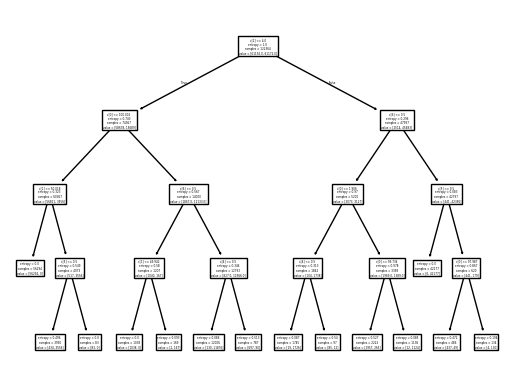

In [283]:
#Decision tree done with best splits and gini criteria
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4, max_features=4, random_state=1)

clf = classifier.fit(X_train, y_train)

clfy_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, clfy_pred)
print("Feature importance: ")
print(clf.feature_importances_)

print(f'Accuracy score: {accuracy}')
tree.plot_tree(clf)

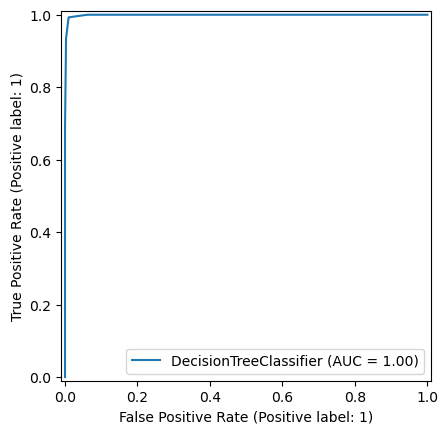

In [284]:
#ROC OF Decision Tree
RocCurveDisplay.from_estimator(clf, X, y)

In [ ]:
##KFOLDs
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)

cvResults = cross_val_score(classifier, X, y, cv=cv)

print(cvResults)
print(f"Accuracy: {cvResults.mean()}")


NameError: name 'StratifiedKFold' is not defined

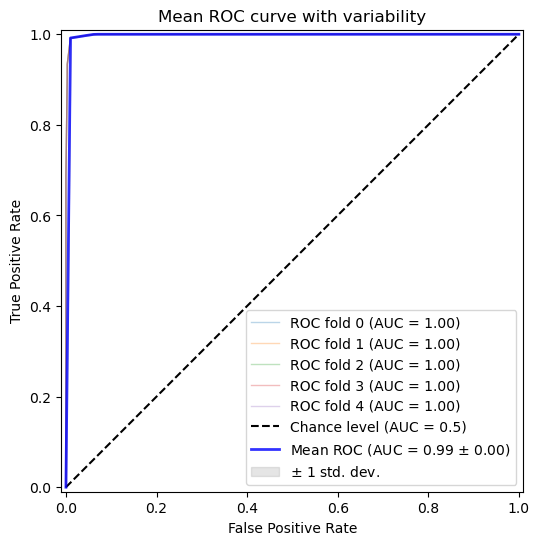

In [286]:
##Roc Curve KFOLDs

tprs = []
aucs = []
feature_importances = []
trees = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X_train, y_train)
    feature_importances.append(classifier.feature_importances_)
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
        plot_chance_level=(fold == n_splits - 1),
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability",
)
ax.legend(loc="lower right")
plt.show()

Feature Importance: [0.26727828 0.15317161 0.45099349 0.         0.02863298 0.02783483
 0.07208881]


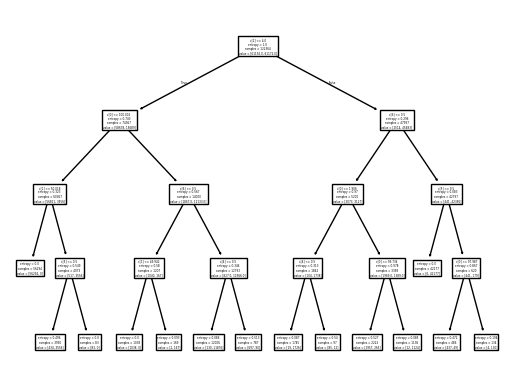

In [297]:
#Generates the image of the decision tree
tree.plot_tree(classifier)
print(f"Feature Importance: {np.mean(feature_importances, axis=0)}")

In [298]:
#Creating a Random Forest and getting the accuracy score
rf = RandomForestClassifier(criterion="entropy", max_depth=4, max_features=4, random_state=1)
rf.fit(X_train,y_train)
rfy_pred = rf.predict(X_test)
rf_accuracy = metrics.accuracy_score(y_test, rfy_pred)
print(f'Accuracy: {rf_accuracy}')

Accuracy: 0.993554784333168


7
Feature importances: [0.20580453 0.08620998 0.53119546 0.00670159 0.03330185 0.02891908
 0.10786751]


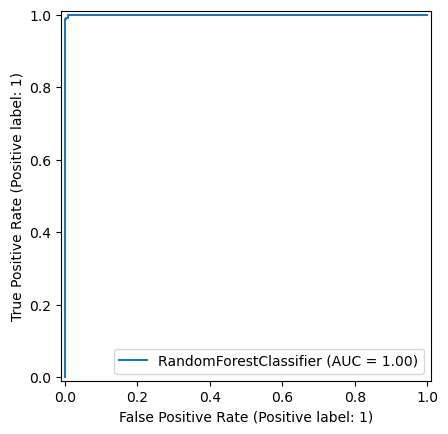

In [299]:
#Random Forest RoC curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
print(rf.n_features_in_)
print(f"Feature importances: {rf.feature_importances_}")


[Text(0.5, 0.9, 'x[2] <= 4.0\nentropy = 1.0\nsamples = 77227\nvalue = [61220, 61144]'),
 Text(0.22, 0.7, 'x[0] <= 99.981\nentropy = 0.743\nsamples = 46993\nvalue = [58656, 15683]'),
 Text(0.36, 0.8, 'True  '),
 Text(0.08, 0.5, 'x[1] <= 50.018\nentropy = 0.318\nsamples = 38156\nvalue = [56825, 3473]'),
 Text(0.04, 0.3, 'entropy = 0.0\nsamples = 35585\nvalue = [56276, 0]'),
 Text(0.12, 0.3, 'x[6] <= 0.5\nentropy = 0.575\nsamples = 2571\nvalue = [549, 3473]'),
 Text(0.08, 0.1, 'entropy = 0.0\nsamples = 203\nvalue = [325, 0]'),
 Text(0.16, 0.1, 'entropy = 0.33\nsamples = 2368\nvalue = [224, 3473]'),
 Text(0.36, 0.5, 'x[6] <= 0.5\nentropy = 0.559\nsamples = 8837\nvalue = [1831.0, 12210.0]'),
 Text(0.28, 0.3, 'x[5] <= 0.5\nentropy = 0.594\nsamples = 755\nvalue = [1012.0, 170.0]'),
 Text(0.24, 0.1, 'entropy = 0.628\nsamples = 684\nvalue = [911, 170]'),
 Text(0.32, 0.1, 'entropy = 0.0\nsamples = 71\nvalue = [101, 0]'),
 Text(0.44, 0.3, 'x[4] <= 0.5\nentropy = 0.342\nsamples = 8082\nvalue = [81

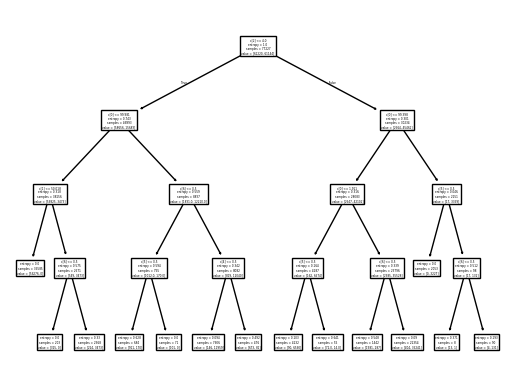

In [300]:
tree.plot_tree(rf[0])

[Text(0.45535714285714285, 0.9, 'x[2] <= 4.0\nentropy = 1.0\nsamples = 77083\nvalue = [61055.0, 61309.0]'),
 Text(0.19642857142857142, 0.7, 'x[0] <= 100.018\nentropy = 0.747\nsamples = 46860\nvalue = [58618, 15862]'),
 Text(0.32589285714285715, 0.8, 'True  '),
 Text(0.10714285714285714, 0.5, 'x[5] <= 0.5\nentropy = 0.329\nsamples = 37991\nvalue = [56775, 3654]'),
 Text(0.07142857142857142, 0.3, 'x[6] <= 0.5\nentropy = 0.354\nsamples = 34341\nvalue = [50981, 3654]'),
 Text(0.03571428571428571, 0.1, 'entropy = 0.0\nsamples = 11329\nvalue = [18016, 0]'),
 Text(0.10714285714285714, 0.1, 'entropy = 0.468\nsamples = 23012\nvalue = [32965, 3654]'),
 Text(0.14285714285714285, 0.3, 'entropy = 0.0\nsamples = 3650\nvalue = [5794, 0]'),
 Text(0.2857142857142857, 0.5, 'x[6] <= 0.5\nentropy = 0.561\nsamples = 8869\nvalue = [1843.0, 12208.0]'),
 Text(0.21428571428571427, 0.3, 'x[5] <= 0.5\nentropy = 0.593\nsamples = 766\nvalue = [1056, 177]'),
 Text(0.17857142857142858, 0.1, 'entropy = 0.629\nsamples

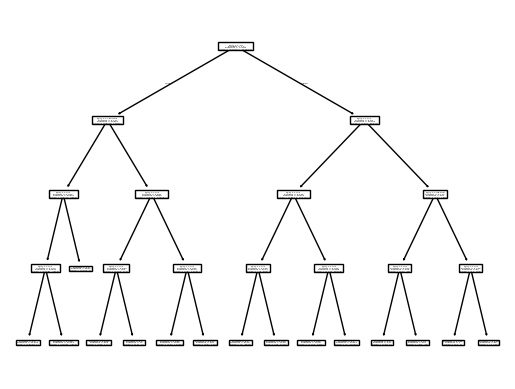

In [307]:
tree.plot_tree(rf[32])

[Text(0.5, 0.9, 'x[6] <= 0.5\nentropy = 1.0\nsamples = 77453\nvalue = [61284, 61080]'),
 Text(0.22, 0.7, 'x[2] <= 4.0\nentropy = 0.544\nsamples = 16785\nvalue = [23276, 3334]'),
 Text(0.36, 0.8, 'True  '),
 Text(0.08, 0.5, 'x[3] <= 0.5\nentropy = 0.061\nsamples = 13433\nvalue = [21177, 153]'),
 Text(0.04, 0.3, 'entropy = 0.0\nsamples = 1565\nvalue = [2483, 0]'),
 Text(0.12, 0.3, 'x[0] <= 100.039\nentropy = 0.068\nsamples = 11868\nvalue = [18694.0, 153.0]'),
 Text(0.08, 0.1, 'entropy = 0.0\nsamples = 11089\nvalue = [17631, 0]'),
 Text(0.16, 0.1, 'entropy = 0.546\nsamples = 779\nvalue = [1063, 153]'),
 Text(0.36, 0.5, 'x[0] <= 1.909\nentropy = 0.969\nsamples = 3352\nvalue = [2099, 3181]'),
 Text(0.28, 0.3, 'x[4] <= 0.5\nentropy = 0.296\nsamples = 1194\nvalue = [98, 1776]'),
 Text(0.24, 0.1, 'entropy = 0.085\nsamples = 1138\nvalue = [19, 1764]'),
 Text(0.32, 0.1, 'entropy = 0.563\nsamples = 56\nvalue = [79, 12]'),
 Text(0.44, 0.3, 'x[5] <= 0.5\nentropy = 0.978\nsamples = 2158\nvalue = [20

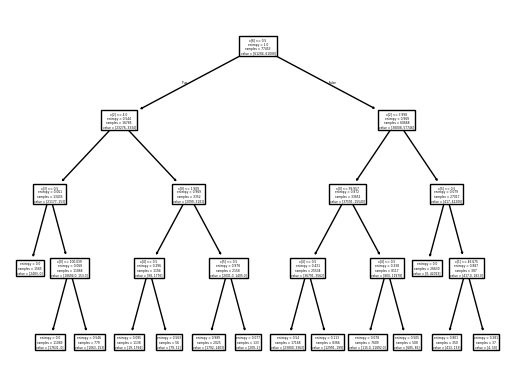

In [302]:
tree.plot_tree(rf[99])